In [1]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split

## Train on Sythetic Data

In [2]:
synthetic_data = pd.read_csv('synthetic_data.csv')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(synthetic_data['News Headlines'], synthetic_data['Label'], test_size=0.2,random_state=42)


In [4]:
start_time = time.time()

In [5]:
## Create the BOW (i.e. word-count matrix) for the training set 
vectorizer=CountVectorizer(ngram_range = (2,2)) #combine the 2 words together and assign the value
X_train_vectorized=vectorizer.fit_transform(X_train)
encoded_text = X_train_vectorized.toarray()
encoded_df = pd.DataFrame(data = encoded_text, columns = vectorizer.get_feature_names_out())
encoded_df

,aa rule,aaa at,aaa credit,aaa into,aaa jew,aaa man,aaa nsmites,aaaw first,aab in,aabo not,...,zurich party,zurich shows,zurich statement,zurich stop,zurich will,zuyevo canadians,zuyevo rice,zwanziger has,zyklon funding,zyklon the
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
model=MultinomialNB()
model.fit(X_train_vectorized,y_train)

MultinomialNB()

In [7]:
end_time = time.time() - start_time
print('Training time: {:.2f} s'.format(end_time))

Training time: 2.39 s


In [8]:
## Perform the prediction on the test set
X_test_vectorized = vectorizer.transform(X_test)
prediction = model.predict(X_test_vectorized)

In [9]:
y_test

1251    1
757     0
1379    1
70      0
1206    1
       ..
904     0
261     0
514     0
1220    1
240     0
Name: Label, Length: 398, dtype: int64

In [10]:
confusion_matrix=confusion_matrix(y_test,prediction)
print(confusion_matrix)

accuracy_score=accuracy_score(y_test,prediction)
print('Accuracy: %.4f' % accuracy_score)

classification_report=classification_report(y_test,prediction)
print(classification_report)

auc = roc_auc_score(y_test, prediction)
print('AUC: %.4f' % auc)

[[177  17]
 [ 16 188]]
Accuracy: 0.9171
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       194
           1       0.92      0.92      0.92       204

    accuracy                           0.92       398
   macro avg       0.92      0.92      0.92       398
weighted avg       0.92      0.92      0.92       398

AUC: 0.9170


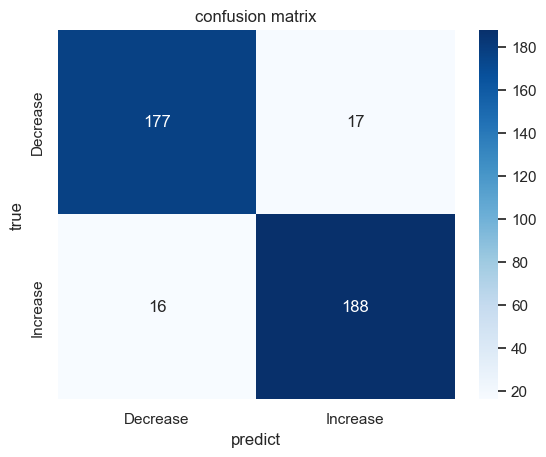

In [12]:
# Plot the confusion matrix heatmap
sns.set()
confusion_matrix_name = pd.DataFrame(confusion_matrix, index=['Decrease', 'Increase'], columns=['Decrease', 'Increase'])
f,ax=plt.subplots()
sns.heatmap(confusion_matrix_name,annot=True, fmt='.20g', cmap=plt.cm.Blues,ax=ax) 

ax.set_title('confusion matrix')
ax.set_xlabel('predict')
ax.set_ylabel('true')
plt.savefig('NB_synthetic_confusion_matrix.png')